# My Titanic Machine Learning Model

Recently I completed my Data Scientist Code Academy course and wanted to test out my new skills. 

Kaggle provides a Machine Learning competition which allows you to predict whether 418 passengers survived or not based on a set of passenger characteristics including their ticket class, name, sex, age, fare, cabin, where they embarked from and if they are part of a family or not. 

Kaggle provides a data set of 891 passengers which includes whether the passenger survived the Titanic's fateful voyage or not (as well as the characteristics mentioned above). 

The aim of the game is to train your model on the 891 data set and use it to predict the survival outcomes for the 418 passengers where this is not proivded. You upload your submission for the 418 passengers to Kaggle and it gives you the % of outcomes you successfully predicted.

In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data dictionary

Survival: 0=No, 1=Yes
pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
sex: Sex, male or female
Age: Age in years
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard
ticket: Ticket number
fare: Passenger fare
cabin: Cabin number
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<AxesSubplot:xlabel='count', ylabel='Survived'>

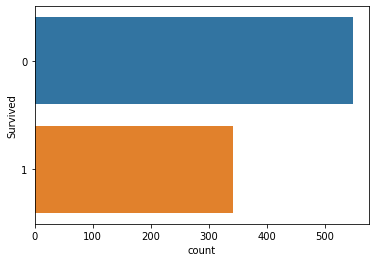

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(data=train_data, y='Survived')

<AxesSubplot:xlabel='count', ylabel='Survived'>

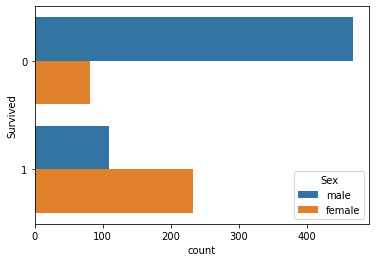

In [6]:
sns.countplot(data=train_data, y='Survived', hue='Sex')

<AxesSubplot:xlabel='count', ylabel='Survived'>

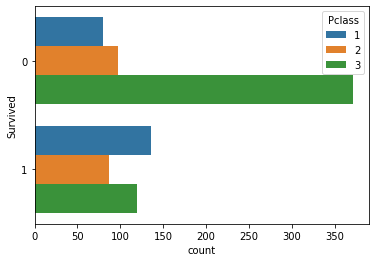

In [7]:
sns.countplot(data=train_data, y='Survived', hue='Pclass')

28.0
29.69911764705882


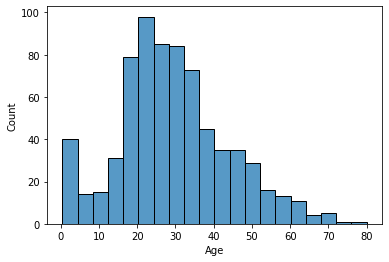

In [8]:
sns.histplot(data=train_data, x='Age')
print(train_data['Age'].median())
print(train_data['Age'].mean())

<AxesSubplot:xlabel='Age', ylabel='Count'>

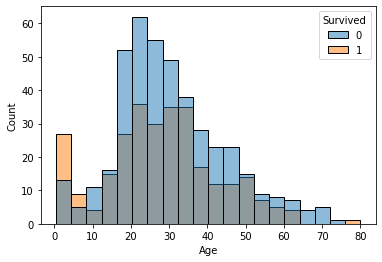

In [9]:
sns.histplot(data=train_data, x='Age', hue='Survived')

In [10]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

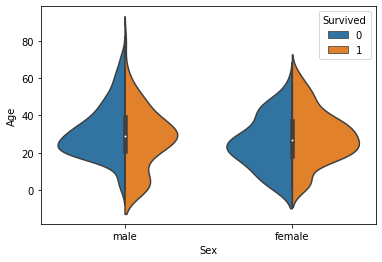

In [11]:
sns.violinplot(data=train_data, x='Sex', y='Age', hue='Survived', split=True )

<AxesSubplot:xlabel='Parch', ylabel='count'>

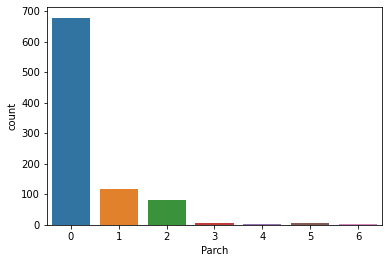

In [12]:
sns.countplot(data=train_data, x='Parch')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

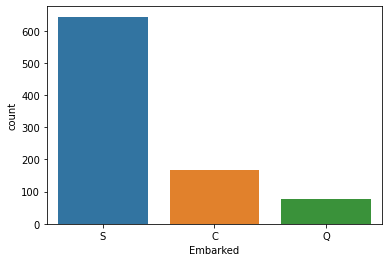

In [13]:
sns.countplot(data=train_data, x='Embarked')

What do the above charts show us?
1. Most people did not survive
2. Out of the survivors, more than two thirds were women
3. Most of the first class passengers survived
4. The overwhelming majority of 3rd class passengers perished
5. The average age of passengers was 29 years old
6. Most people embarked at Southampton

In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Prep

In [15]:
train_data_ns = train_data[['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
train_data_ns.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
all_data = [train_data_ns, test_data]
df = pd.concat(all_data)
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [17]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df.drop(['Ticket','PassengerId'], axis=1, inplace=True)

In [19]:
gender_mapper = {'male':0, 'female':1}
df['Sex'].replace(gender_mapper, inplace=True)

In [20]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,NaN,S


In [21]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
df['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in df['Title']]
df = df.rename(columns={'Title':'Title_Unusual'})
df.drop('Name', axis=1, inplace=True)

In [22]:
df['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in df['Cabin']]
df.drop('Cabin', axis=1, inplace=True)

In [23]:
emb_dummies = pd.get_dummies(df['Embarked'], drop_first=True, prefix='Embarked')
df = pd.concat([df, emb_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

,Pclass,Sex,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S,mice_ages
0,3,0,1,0,7.2500,0,0,0,1,22.000000
1,1,1,1,0,71.2833,0,1,0,0,38.000000
2,3,1,0,0,7.9250,0,0,0,1,26.000000
3,1,1,1,0,53.1000,0,1,0,1,35.000000
4,3,0,0,0,8.0500,0,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,8.0500,0,0,0,1,27.647182
414,1,1,0,0,108.9000,1,1,0,0,39.000000
415,3,0,0,0,7.2500,0,0,0,1,38.500000
416,3,0,0,0,8.0500,0,0,0,1,27.647182


In [24]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,0,0,0,1
414,1,1,39.0,0,0,108.9000,1,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,0,1
416,3,0,NaN,0,0,8.0500,0,0,0,1


In [26]:
from impyute.imputation.cs import mice

imputed = mice(df.values)
mice_ages = imputed[:, 2]

In [27]:
mice_ages = [0 if age < 0 else age for age in mice_ages]

In [28]:
df['mice_ages'] = mice_ages

In [29]:
df.drop('Age', axis=1, inplace=True)

In [30]:
trainingset = df[0:891]

In [31]:
testset = df[891:]

In [32]:
X = trainingset
y = train_data['Survived']
Kaggle_test = testset

In [42]:
trainingset

,Pclass,Sex,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S,mice_ages
0,3,0,1,0,7.2500,0,0,0,1,22.000000
1,1,1,1,0,71.2833,0,1,0,0,38.000000
2,3,1,0,0,7.9250,0,0,0,1,26.000000
3,1,1,1,0,53.1000,0,1,0,1,35.000000
4,3,0,0,0,8.0500,0,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,13.0000,1,0,0,1,27.000000
887,1,1,0,0,30.0000,0,1,0,1,19.000000
888,3,1,1,2,23.4500,0,0,0,1,20.437235
889,1,0,0,0,30.0000,0,1,0,0,26.000000


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 10), (223, 10), (668,), (223,))

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=32, max_depth = 5, random_state=1, min_samples_leaf=3, max_features=0.5)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8637724550898204

In [37]:
predictions = model.predict(Kaggle_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [38]:
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [266]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []

for estimator in n_estimators:
    nmodel = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    nmodel.fit(X_train, y_train)
    
    train_pred = nmodel.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = nmodel.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

TypeError: unhashable type: 'list'

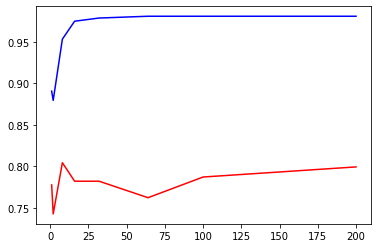

In [268]:
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.xlabel('AUC Score')
plt.ylabel('n_estimators')
plt.show()

We can see that for or data, we can stop at 32 trees as increasing the number of trees decreases the test performance

In [269]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dmodel = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    dmodel.fit(X_train, y_train)
    
    train_pred = dmodel.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dmodel.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

TypeError: unhashable type: 'list'

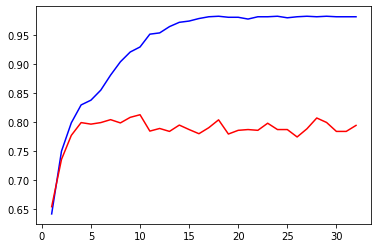

In [270]:
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.xlabel('AUC Score')
plt.ylabel('Tree Depth')
plt.show()

We can see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data